In [59]:
import pandas as pd
import numpy as np

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("imports-85.data.txt",header=None, names=headers, na_values="?" )
# df = df.dropna(how='any')
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [60]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [103]:
chi = pd.pivot_table(df,index='fuel_system',columns='engine_type',aggfunc='count',fill_value=0,margins=True)['engine_location'].reset_index()
chi = chi.fillna(0)
chi

engine_type,fuel_system,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,All
0,1bbl,0.0,0.0,0.0,11.0,0.0,0.0,0.0,11.0
1,2bbl,0.0,0.0,1.0,57.0,8.0,0.0,0.0,63.0
2,4bbl,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,idi,0.0,0.0,5.0,15.0,0.0,0.0,0.0,15.0
4,mfi,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,mpfi,12.0,1.0,6.0,54.0,7.0,13.0,1.0,64.0
6,spdi,0.0,0.0,0.0,9.0,0.0,0.0,0.0,5.0
7,spfi,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,All,8.0,0.0,8.0,123.0,12.0,8.0,0.0,159.0


In [130]:
observed = chi.ix[0:8,1:8]

In [108]:
chi.iloc[0:,1:]

engine_type,dohc,dohcv,l,ohc,ohcf,ohcv,rotor,All
0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,11.0
1,0.0,0.0,1.0,57.0,8.0,0.0,0.0,63.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,0.0,0.0,5.0,15.0,0.0,0.0,0.0,15.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,12.0,1.0,6.0,54.0,7.0,13.0,1.0,64.0
6,0.0,0.0,0.0,9.0,0.0,0.0,0.0,5.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,8.0,0.0,8.0,123.0,12.0,8.0,0.0,159.0


In [118]:
# row totals
rw = chi['All'][0:8]
# col totals 
col = chi.iloc[8][1:8]

In [122]:
expected = np.outer(rw,col)/159
expected = pd.DataFrame(expected)

In [123]:
expected

,0,1,2,3,4,5,6
0,0.553459,0,0.553459,8.50943,0.830189,0.553459,0
1,3.16981,0,3.16981,48.7358,4.75472,3.16981,0
2,0,0,0,0,0,0,0
3,0.754717,0,0.754717,11.6038,1.13208,0.754717,0
4,0.0503145,0,0.0503145,0.773585,0.0754717,0.0503145,0
5,3.22013,0,3.22013,49.5094,4.83019,3.22013,0
6,0.251572,0,0.251572,3.86792,0.377358,0.251572,0
7,0,0,0,0,0,0,0


In [132]:
import scipy.stats as stats
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 8)   # *

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=8)
print("P value")
print(p_value)

# if p-value > 0.05, considered no relationship between the variables. 

0.0
Critical value
15.5073130559
P value
1.0


/home/chenjennhaur/anaconda3/lib/python3.5/site-packages/pandas/core/indexes/base.py:3033: RuntimeWarning: unorderable types: int() > str(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [ ]:
# ANOVA

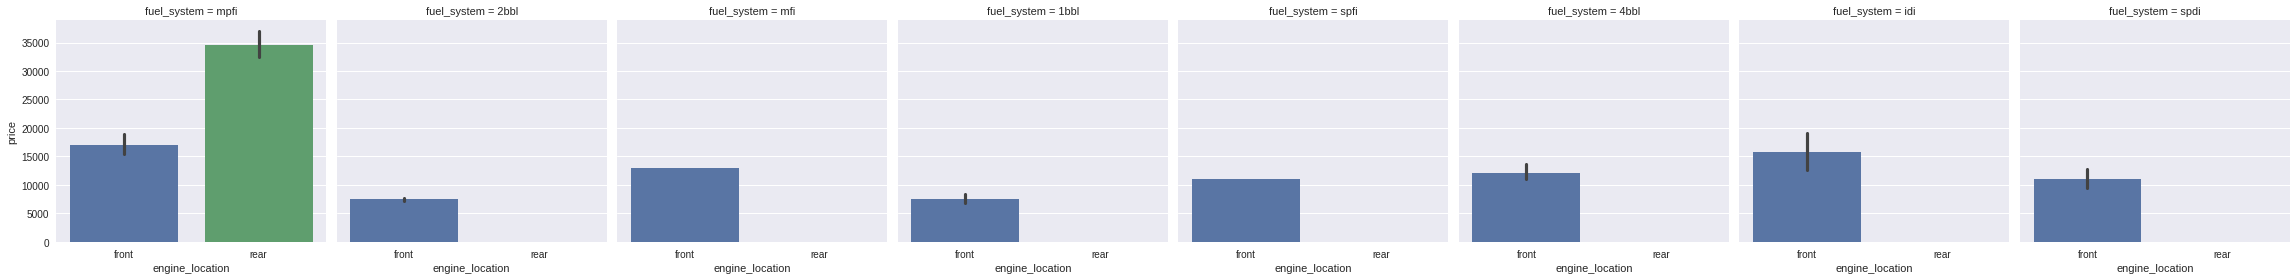

In [61]:
import seaborn
import matplotlib.pyplot as plt 
%matplotlib inline  

fg = seaborn.factorplot(x='engine_location', y='price',col='fuel_system',kind='bar', data=df)

In [5]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [6]:
obj_df['engine_type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine_type, dtype: int64

In [24]:
import category_encoders as ce

# Specify the columns to encode then fit and transform
encoder = ce.backward_difference.BackwardDifferenceEncoder(cols=["engine_type"])
# encoder = ce.LeaveOneOutEncoder(cols=["engine_type"])
encoder.fit(obj_df, verbose=1)

# Only display the first 8 columns for brevity
encoder.transform(obj_df).head(5)

,col_engine_type_0,col_engine_type_1,col_engine_type_2,col_engine_type_3,col_engine_type_4,col_engine_type_5,col_engine_type_6,col_make,col_fuel_type,col_aspiration,col_num_doors,col_body_style,col_drive_wheels,col_engine_location,col_num_cylinders,col_fuel_system
0,1.0,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,alfa-romero,gas,std,two,convertible,rwd,front,four,mpfi
1,1.0,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,alfa-romero,gas,std,two,convertible,rwd,front,four,mpfi
2,1.0,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,alfa-romero,gas,std,two,hatchback,rwd,front,six,mpfi
3,1.0,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,audi,gas,std,four,sedan,fwd,front,four,mpfi
4,1.0,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,audi,gas,std,four,sedan,4wd,front,five,mpfi


In [79]:
automg = pd.read_csv('auto-mpg.data.txt',sep='\s+',names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'])
automg.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite


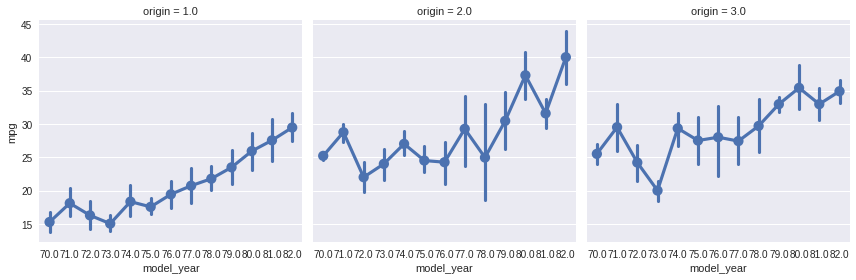

In [81]:
seaborn.factorplot(data=automg, x="model_year", y="mpg", col="origin")

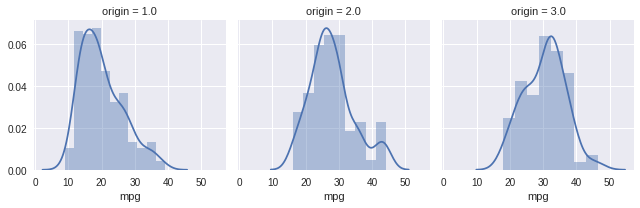

In [83]:
g = seaborn.FacetGrid(automg, col="origin") 
g.map(seaborn.distplot, "mpg")

/home/chenjennhaur/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/chenjennhaur/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


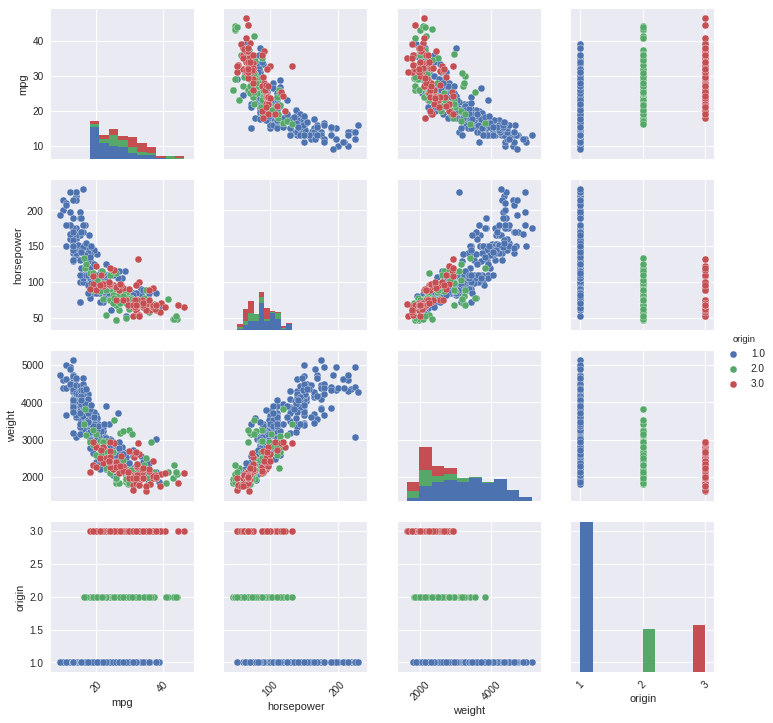

In [87]:
g = seaborn.pairplot(automg[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")

for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

/home/chenjennhaur/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/chenjennhaur/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


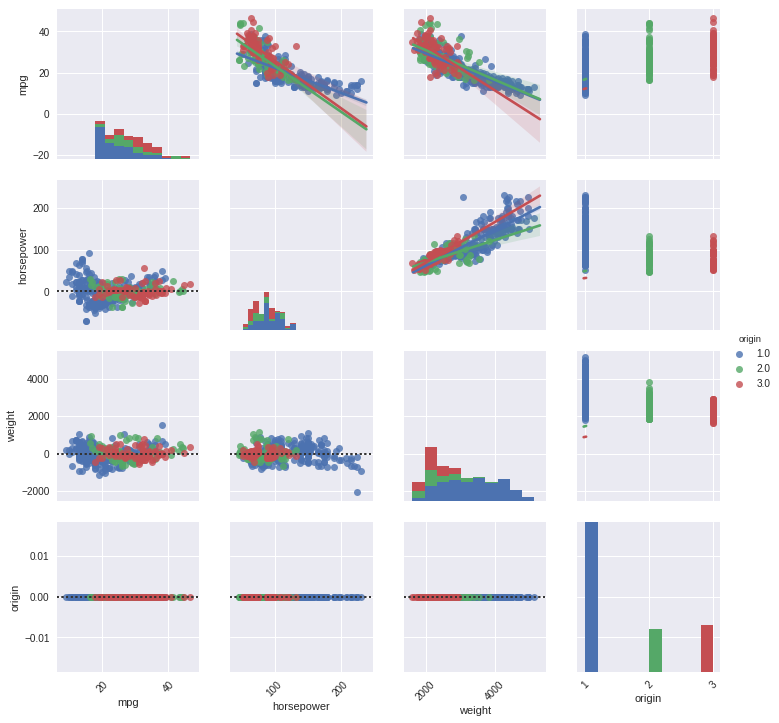

In [88]:
g = seaborn.PairGrid(automg[["mpg", "horsepower", "weight", "origin"]], hue="origin") 
g.map_upper(seaborn.regplot) 
g.map_lower(seaborn.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

In [25]:
from sklearn.datasets import load_boston
bunch = load_boston()
y = bunch.target
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)


In [43]:
data = X
data['target'] = y.tolist()
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [27]:
X['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [28]:
X['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [30]:
enc = ce.LeaveOneOutEncoder(cols=['CHAS', 'RAD']).fit(X, y)
numeric_dataset = enc.transform(X)
print(numeric_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
CHAS       506 non-null float64
RAD        506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [32]:
numeric_dataset['CHAS'].value_counts()

22.093843    471
28.440000     35
Name: CHAS, dtype: int64

In [44]:
pd.pivot_table(data,index=['CHAS'],values=['target'])

,target
CHAS,
0.0,22.093843
1.0,28.440000
